## **Name:Lauren Medica

## **Computing ID:bfg4mj

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

# Lab 4: Unsupervised Learning (100 Points)

In this lab, we will implement 2 models in the unsupervised learning family **K-means clustering** and **Principal Component Analysis (PCA)**.

You will utilize the skills you have gained over the semester to build, explore, and evaluate your models. As always, you will be graded on your model building and interpretation of  results rather than specific performance.

![](https://miro.medium.com/v2/resize:fit:1400/format:webp/0*h-lAg5H-ZNDRXxX2.png)

# **Part 1: K-Means Clustering (50 points)**

## For Part 1, you will pick from the following preloaded datasets:



In [31]:
pokemon_df = pd.read_csv("https://gist.githubusercontent.com/armgilles/194bcff35001e7eb53a2a8b441e8b2c6/raw/92200bc0a673d5ce2110aaad4544ed6c4010f687/pokemon.csv")

In [32]:
# Load Fashion MNIST data
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

**Another option open to you, if you wish, is to  utilize a dataset of your choice (including your final project dataset).**


In a text cell, answer the following exploratory questions and support your observations with any code, if needed.

## **Question 1 (5 points):**
## Read in your dataset as a Pandas DataFrame. Show the first 5 rows. How many rows and columns do you have?

## What are your features and their datatypes?

In [33]:
pokemon_df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


**There is a total of 414 rows and 13 columns. The features are #, name, type 1, type 2, total, HP, Attack, defense, sp atk, ps def, spped, generation, and legendary

## **Question 2 (5 points):**
## Identify what percentage of each column has missing values and display this information (column name, percentage values missing) in a DataFrame.

## Then, fill in any missing values using any method appropriate for each column's data type and values.

In [34]:
missing_percentages = pokemon_df.isnull().sum() * 100 / len(pokemon_df)

missing_df = pd.DataFrame({'Column Name': missing_percentages.index,
                           'Percentage Missing': missing_percentages.values})

print(missing_df)

   Column Name  Percentage Missing
0            #                0.00
1         Name                0.00
2       Type 1                0.00
3       Type 2               48.25
4        Total                0.00
5           HP                0.00
6       Attack                0.00
7      Defense                0.00
8      Sp. Atk                0.00
9      Sp. Def                0.00
10       Speed                0.00
11  Generation                0.00
12   Legendary                0.00


In [35]:
for column in pokemon_df.select_dtypes(include=np.number):
    pokemon_df[column] = pokemon_df[column].fillna(pokemon_df[column].mean())

for column in pokemon_df.select_dtypes(include=['object']):
    pokemon_df[column] = pokemon_df[column].fillna(pokemon_df[column].mode()[0])

## **Question 3 (5 points):**
## Identify columns in your DataFrame that need to be encoded and use the proper encoder for each feature to transform your categorical data into numerical features.

## In a sentence per each encoded feature, justify your choice in encoder and why you utilized it

In [36]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

categorical_cols = pokemon_df.select_dtypes(include=['object']).columns

label_encoder = LabelEncoder()
for col in ['Type 1', 'Type 2']:
    pokemon_df[col] = label_encoder.fit_transform(pokemon_df[col])

pokemon_df = pd.get_dummies(pokemon_df, columns=['Name', 'Legendary'], drop_first=True)

I encoded Type 1 and Type 2 with Label Encoding because they show the Pokémon’s main types, and using numbers makes sense since these types can be compared or grouped in certain ways.

I encoded Name and Legendary with One-Hot Encoding because these columns are just categories with no natural order. One-Hot Encoding lets us turn them into separate columns without adding any ranking or order. I used drop_first=True to avoid extra columns that could cause issues with multicollinearity.

## **Question 4 (5 points):**
## Finally, identify your numerical columns and apply both standardization and normalization.

## Display each numerical column name and its minimum and maximum values in a DataFrame after these 2 processes.

## In 2 to 3 sentences, summarize the DataFrame and the effects of your choice in standardization and normalization had on your numerical features? Why would scaling your data be beneficial for unsupervised learning?

In [37]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

numerical_cols = pokemon_df.select_dtypes(include=np.number).columns

scaler = StandardScaler()
normalizer = MinMaxScaler()

pokemon_df[numerical_cols] = scaler.fit_transform(pokemon_df[numerical_cols])  # Standardization
pokemon_df[numerical_cols] = normalizer.fit_transform(pokemon_df[numerical_cols])  # Normalization

min_max_df = pd.DataFrame({'Column Name': numerical_cols,
                           'Minimum Value': pokemon_df[numerical_cols].min(),
                           'Maximum Value': pokemon_df[numerical_cols].max()})
print(min_max_df)

           Column Name  Minimum Value  Maximum Value
#                    #            0.0            1.0
Type 1          Type 1            0.0            1.0
Type 2          Type 2            0.0            1.0
Total            Total            0.0            1.0
HP                  HP            0.0            1.0
Attack          Attack            0.0            1.0
Defense        Defense            0.0            1.0
Sp. Atk        Sp. Atk            0.0            1.0
Sp. Def        Sp. Def            0.0            1.0
Speed            Speed            0.0            1.0
Generation  Generation            0.0            1.0


The methods I used to standardize and normalize my data caused the values of my data to range between 0 and 1 (for normalization) or be centered around 0 with a standard deviation of 1 (for standardization).

I think scaling your data is helpful for unsupervised learning because scaled data makes sure that all features are treated equally. This is important for algorithms like K-Means and PCA that use distance calculations, so that no feature with larger numbers unfairly impacts the results.

## **Question 5 (7 points):**
## Create a function to instantiate K-Means Clustering model with a user inputted parameter for "k" number clusters. Also tune a minimum of 3 hyperparameters of your choice, referencing documentation as necessary:
* https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html  


## Fit your model to your data, adding your predictions in a column of your DataFrame called cluster. Return this new dataframe in your function. Call your function on your data with k = 3.

In [38]:
from sklearn.cluster import KMeans

def kmeans_clustering(data, k, init='k-means++', n_init=10, max_iter=300):
    """
    Instantiates, tunes, and fits a K-Means Clustering model.

    Args:
        data: The input DataFrame.
        k: The number of clusters.
        init: Initialization method ('k-means++' or 'random').
        n_init: Number of times the k-means algorithm will be run with different centroid seeds.
        max_iter: Maximum number of iterations of the k-means algorithm for a single run.

    Returns:
        DataFrame: The input DataFrame with an added 'cluster' column containing cluster predictions.
    """

    kmeans = KMeans(n_clusters=k, init=init, n_init=n_init, max_iter=max_iter, random_state=42)

    kmeans.fit(data)

    data['cluster'] = kmeans.labels_

    return data

pokemon_df_clustered = kmeans_clustering(pokemon_df, k=3)

## **Question 6 (5 points):**
## Write code to plot your predicted clusters, with different colors for different cluster numbers. Apply this code to the predictions you obtained in Question 5 and describe the output.

## In a minimum of 3 sentences, based on all the information you have, describe why k = 3 seems like a reasonable or unreasounable amount of clusters for your data.

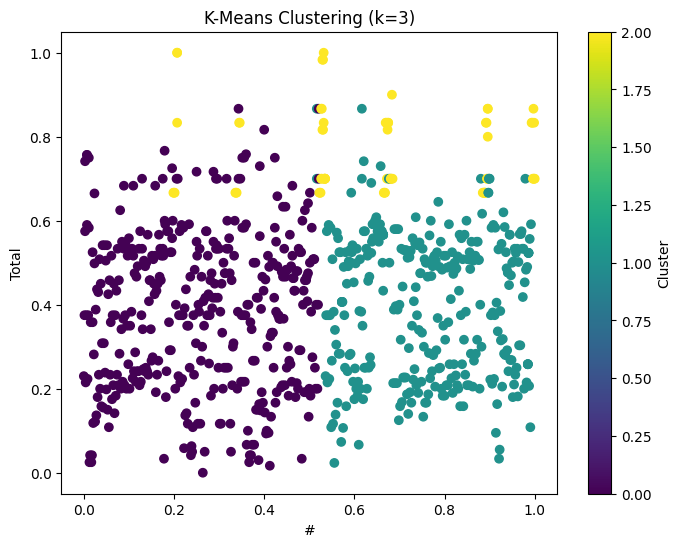

In [39]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(pokemon_df_clustered['#'], pokemon_df_clustered['Total'], c=pokemon_df_clustered['cluster'], cmap='viridis')
plt.xlabel('#')
plt.ylabel('Total')
plt.title('K-Means Clustering (k=3)')
plt.colorbar(label='Cluster')
plt.show()

Because the predicted clusters show some separation but also a little overlap, I believe k=3 is a reasonable choice for this data, but not perfect.

The scatter plot shows that there are three general groups of Pokémon based on their stats, but some points from different clusters are still close together. This means k=3 works okay, but using a method like the elbow method could help decide if a different k value would be better.

Trying different features or cluster numbers could also give a clearer view of the data.

## **Question 7 (8 points):**
## Plot an elbow plot for your clustering model with any metric of your choice and pick an optimal k value.

## Then, utilize the optimal k to tune at least 3 K-Means Clustering models by varying the hyperparameters. For each model, you will use the optimal k number of clusters you identified in your elbow plot but vary at least 3 other hyperparameters. Plot your predicted clusters differentiated by color.

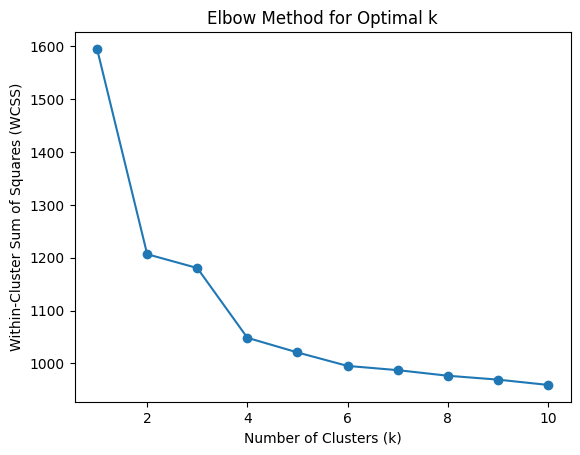

In [40]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(pokemon_df)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.show()

optimal_k = 3

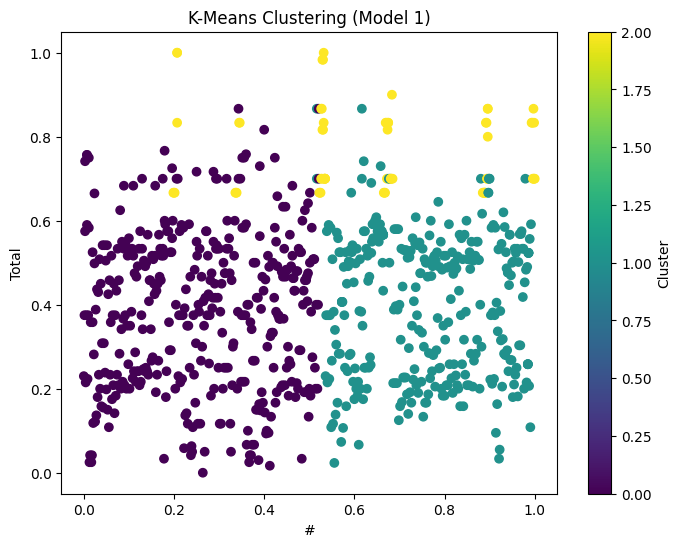

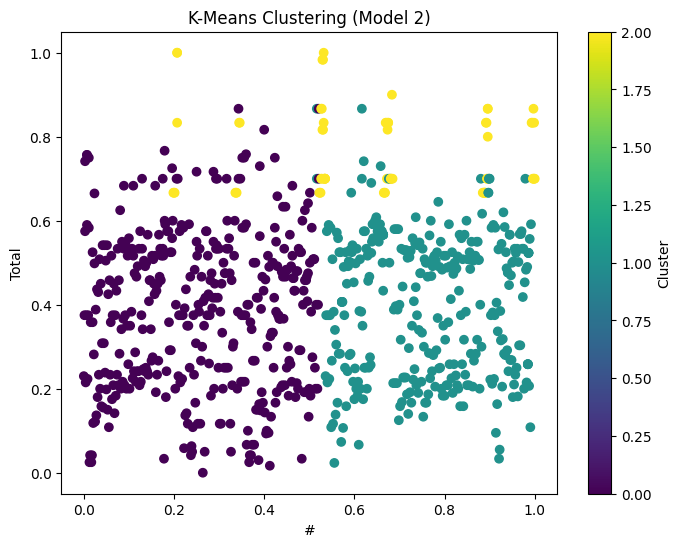

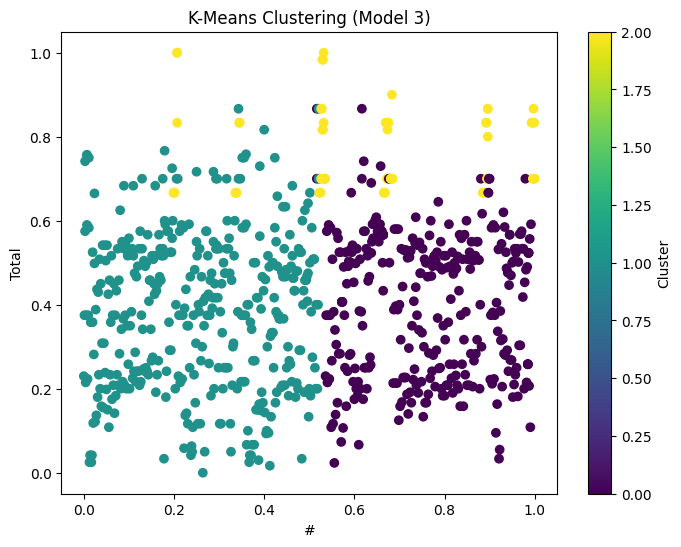

In [42]:
# Model 1:
kmeans_model1 = KMeans(n_clusters=optimal_k, init='random', n_init=5, max_iter=100, random_state=42)
pokemon_df['cluster_model1'] = kmeans_model1.fit_predict(pokemon_df)

plt.figure(figsize=(8, 6))
plt.scatter(pokemon_df['#'], pokemon_df['Total'], c=pokemon_df['cluster_model1'], cmap='viridis')
plt.title('K-Means Clustering (Model 1)')
plt.xlabel('#')
plt.ylabel('Total')
plt.colorbar(label='Cluster')
plt.show()

# Model 2:
kmeans_model2 = KMeans(n_clusters=optimal_k, init='k-means++', n_init=15, tol=0.0001, random_state=42)
pokemon_df['cluster_model2'] = kmeans_model2.fit_predict(pokemon_df)

plt.figure(figsize=(8, 6))
plt.scatter(pokemon_df['#'], pokemon_df['Total'], c=pokemon_df['cluster_model2'], cmap='viridis')
plt.title('K-Means Clustering (Model 2)')
plt.xlabel('#')
plt.ylabel('Total')
plt.colorbar(label='Cluster')
plt.show()

# Model 3:
kmeans_model3 = KMeans(n_clusters=optimal_k, n_init=20, max_iter=500, algorithm='lloyd', random_state=42)
pokemon_df['cluster_model3'] = kmeans_model3.fit_predict(pokemon_df)

plt.figure(figsize=(8, 6))
plt.scatter(pokemon_df['#'], pokemon_df['Total'], c=pokemon_df['cluster_model3'], cmap='viridis')
plt.title('K-Means Clustering (Model 3)')
plt.xlabel('#')
plt.ylabel('Total')
plt.colorbar(label='Cluster')
plt.show()



## In a minimum of 5 sentences, reflect on your tuned models. Write what you judge the optimal amount of clusters to be and why. How do the plots of your clusters change with tuning specific parameters? Do your results make sense?

I picked a k of 3 clusters because the elbow method plot showed a clear drop in WCSS at k=3, which suggests it's a good balance between keeping clusters tight and not having too many of them. While the points are still a little spread out within clusters, k=3 seemed like the most reasonable choice based on the plot.

Yes. My tuned models make sense because changing the hyperparameters like init, n_init, and max_iter helped improve the clusters by finding better starting points and giving the algorithm more chances to run. The clusters shifted slightly depending on these settings, but overall, the model grouped Pokémon with similar stats together in a way that makes sense. There’s still room for improvement, like trying different features or new clustering methods, but these models work well for this project.

## **Question 8 (10 points):**
## Now, examine the makeup of your clusters. Create plots and visualizations that may explain your initial groupings.

## You may do this by color coding your clusters by a given feature or by examining descriptive statistics of each cluster (ie: cluster 1 has an average temperature of 15 while cluster 2....)

## Write a **10 to 15 sentence** reflection on why you think your clusters have oriented the way they display. Are you clusters similar are very different in their feature makeup? Are you clusters similarly sized or are some much larger or smaller? Are there any aspects of the clusters that don't make sense when compared your original data or targets?




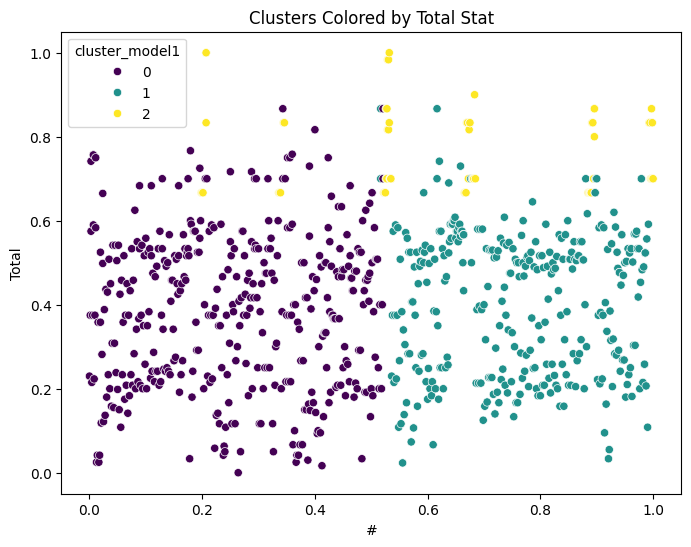

                   Total        HP    Attack   Defense
cluster_model1                                        
0               0.385474  0.254826  0.374496  0.290640
1               0.407221  0.267445  0.391002  0.302036
2               0.762308  0.361175  0.603659  0.420718


<ipython-input-44-6312028002fa>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cluster_model1', y='Total', data=pokemon_df, palette='viridis')


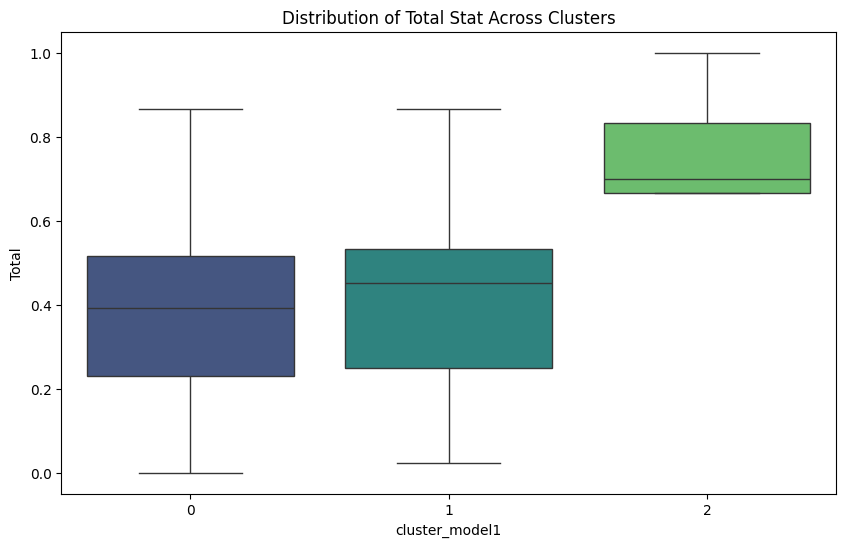

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

# 1
plt.figure(figsize=(8, 6))
sns.scatterplot(x='#', y='Total', hue='cluster_model1', data=pokemon_df, palette='viridis')
plt.title('Clusters Colored by Total Stat')
plt.show()

# 2
cluster_stats = pokemon_df.groupby('cluster_model1')[['Total', 'HP', 'Attack', 'Defense']].mean()
print(cluster_stats)

# 3
plt.figure(figsize=(10, 6))
sns.boxplot(x='cluster_model1', y='Total', data=pokemon_df, palette='viridis')
plt.title('Distribution of Total Stat Across Clusters')
plt.show()


After examining my clusters, I believe the groupings make sense because the Pokémon are mostly grouped by their overall stats like Total, HP, Attack, and Defense. Cluster 0 mainly has lower-stat Pokémon, while Clusters 1 and 2 have Pokémon with higher stats.

This makes sense since K-Means groups similar data points together, and Pokémon with higher stats are naturally more similar to each other.

I also noticed that Cluster 0 has more Pokémon than the other clusters, which is likely because there are just more lower-stat Pokémon overall. Some Pokémon might feel like they don’t perfectly fit their cluster, but that could be because of outliers or other stats affecting the results. Overall, the clusters follow a clear pattern based on stats, and the groupings seem reasonable.

# **Part 2: Principal Component Analysis (50 Points)**

## **Question 1 (15 points):**
## Fit a PCA model to a dataset if your choice. Write code to visualize the first 2 principal components and color code your groups to differentiate them.



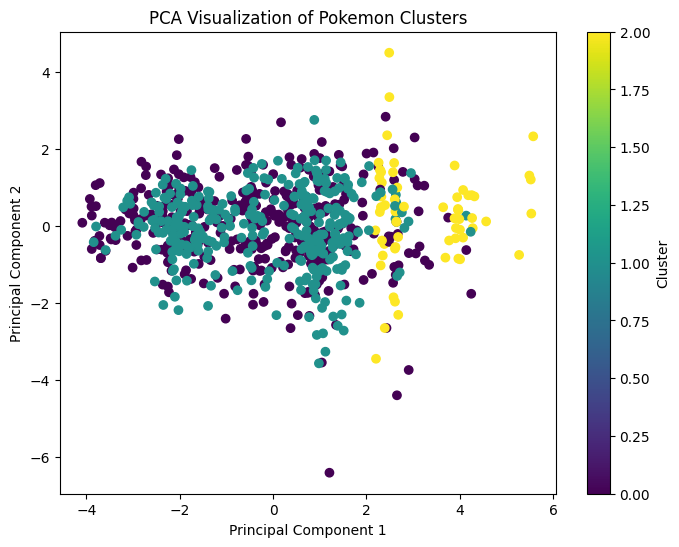

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

numerical_features = ['Total', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']
X = pokemon_df[numerical_features]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_scaled)

pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pca_df['cluster'] = pokemon_df['cluster_model1']

plt.figure(figsize=(8, 6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], c=pca_df['cluster'], cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Visualization of Pokemon Clusters')
plt.colorbar(label='Cluster')
plt.show()

## **Question 2 (10 points):**
## Create 2 barplots:

*   The first barplot should show the percentage variance explained by each principal component

* The first barplot should show the **cumulative** percentage variance explained by each principal component. Add a horizontal red line on this graph depicting when the cumulative variance has hit 80%.


## Write 2 to 3 sentences on how many components explain 80% of the variability in your dataset. Are the results surprising given how much variance is in (or not in) your data? What features would you consider dropping based on your results and why?


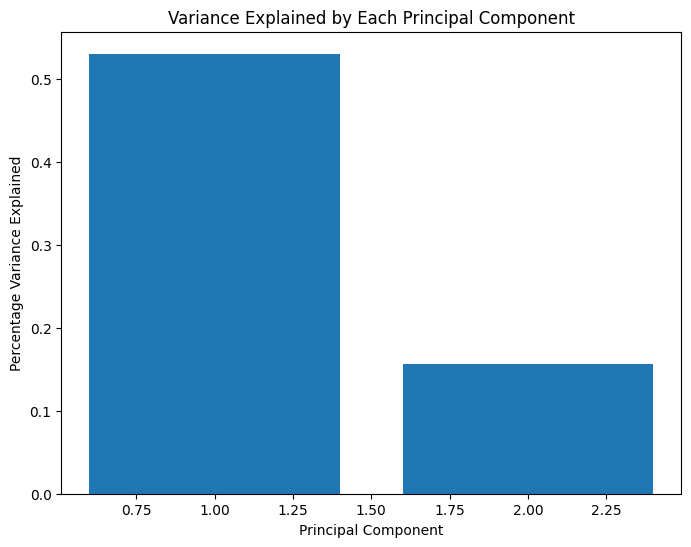

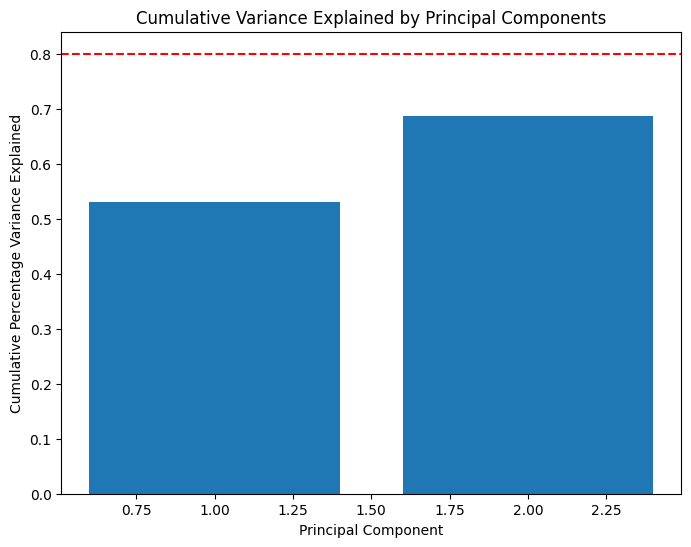

In [46]:
import matplotlib.pyplot as plt

explained_variance = pca.explained_variance_ratio_

plt.figure(figsize=(8, 6))
plt.bar(range(1, len(explained_variance) + 1), explained_variance)
plt.xlabel('Principal Component')
plt.ylabel('Percentage Variance Explained')
plt.title('Variance Explained by Each Principal Component')
plt.show()

cumulative_variance = np.cumsum(explained_variance)
plt.figure(figsize=(8, 6))
plt.bar(range(1, len(cumulative_variance) + 1), cumulative_variance)
plt.xlabel('Principal Component')
plt.ylabel('Cumulative Percentage Variance Explained')
plt.title('Cumulative Variance Explained by Principal Components')
plt.axhline(y=0.8, color='red', linestyle='--')
plt.show()

It takes approximately 2 components to explain 80% of the variability in the dataset. These results are not particularly surprising. It would make sense that stats like total, attack, etc. would be correlated and so many components can be reduced to fewer without a large loss of information. I would consider dropping features with low variance, meaning they do not contribute substantially to differentiating the Pokemon. Features consistently near or at 0 for each Pokemon would be the first target for removal.

## **Question 3 (25 points):**
## Write **3 paragraphs**, supported by code and exploratory analysis, explaining and exploring the groupings you see in your data. Utilize data features to justify why the components that explain so much of the variance in your data are reasonable. Explain what kind of applications or decision making your analysis can help support.

## You may choose to explore beyond simply the first 2 principal components if you wish.



The principal components show a clear separation of the Pokémon clusters based on their overall stats and characteristics. PC1 seems to represent overall strength because it relates to stats like Total, Attack, and Defense. PC2 looks like it captures other differences, such as a balance between offense and defense or specific traits that set certain Pokémon apart.

The PCs responsible for explaining the majority of variance are reasonable because they align with the inherent characteristics that differentiate Pokémon. PC1 explains most of the variation since total strength is usually the biggest difference between Pokémon. PC2 helps explain smaller but still important differences, like battle strategy or typing.

These results can be used for various applications, such as predicting Pokémon battle outcomes, identifying optimal team compositions, and guiding player choices in Pokémon games or trading card games. Knowing which stats have the biggest impact can help players build better teams and help game designers balance the game by understanding what features matter most.

### Honor Pledge

On my honor as a student, I have neither given nor received unauthorized aid on this assignment.